# Collisions Cleaning

This script cleans the original collisions dataset from Montreal, which can be found at [here](https://open.canada.ca/data/en/dataset/cd722e22-376b-4b89-9bc2-7c7ab317ef6b).  In this notebook, we
- drop non-useful columns
- rename columns to english
- extract useful date columns from date
- impute null values
- drop null values

The final saved dataset is `collisions_cleaned.csv`.

We start by importing the standard libraries, and reading in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)

In [2]:
collisions = pd.read_csv('Data/collisions_routieres.csv')
collisions.head()

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,NB_METRE_DIST_ACCD,CD_GENRE_ACCDN,CD_SIT_PRTCE_ACCDN,CD_ETAT_SURFC,CD_ECLRM,CD_ENVRN_ACCDN,NO_ROUTE,CD_CATEG_ROUTE,CD_ETAT_CHASS,CD_ASPCT_ROUTE,CD_LOCLN_ACCDN,CD_POSI_ACCDN,CD_CONFG_ROUTE,CD_ZON_TRAVX_ROUTR,CD_PNT_CDRNL_ROUTE,CD_PNT_CDRNL_REPRR,CD_COND_METEO,NB_VEH_IMPLIQUES_ACCDN,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,HEURE_ACCDN,AN,NB_VICTIMES_TOTAL,GRAVITE,REG_ADM,MRC,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_VICTIMES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LAT,LOC_LONG
0,SPVM _ 2012 _ 1,ME,2012/02/01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,NaN,31.0,NaN,16.0,1.0,1.0,NaN,21.0,NaN,11.0,33.0,NaN,4.0,NaN,NaN,NaN,11.0,2,0,0,0,Non précisé,2012,0,Dommages matériels inférieurs au seuil de rapp...,Montréal(06),Montréal (66 ),1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,276517.37950,5.035127e+06,A,3,O,N,45.45550,-73.86162
1,SPVM _ 2012 _ 2,SA,2012/06/02,66023.0,NaN,NaN,NaN,NaN,NaN,COTE VERTU ET AUT 40,NaN,59.0,NaN,11.0,1.0,3.0,NaN,11.0,NaN,22.0,37.0,NaN,1.0,NaN,NaN,NaN,11.0,1,0,0,0,15:00:00-15:59:00,2012,0,Dommages matériels seulement,Montréal(06),Montréal (66 ),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,287913.26000,5.038666e+06,A,3,N,O,45.48772,-73.71603
2,SPVM _ 2012 _ 3,JE,2012/06/28,66023.0,NaN,NaN,NaN,COTE VERTU,1.0,DECARIE,NaN,31.0,NaN,11.0,1.0,3.0,NaN,13.0,NaN,11.0,32.0,NaN,3.0,NaN,NaN,O,11.0,2,0,0,0,08:00:00-08:59:00,2012,0,Dommages matériels inférieurs au seuil de rapp...,Montréal(06),Montréal (66 ),1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.0,290518.82501,5.041617e+06,A,1,N,N,45.51432,-73.68279
3,SPVM _ 2012 _ 4,ME,2012/07/11,66023.0,NaN,NaN,NaN,ST MATHIEU,1.0,RENE LEVESQUE,50.0,31.0,NaN,11.0,3.0,3.0,NaN,13.0,NaN,11.0,33.0,NaN,2.0,NaN,NaN,NaN,11.0,2,0,0,0,09:00:00-09:59:00,2012,0,Dommages matériels inférieurs au seuil de rapp...,Montréal(06),Montréal (66 ),1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,50.0,298822.88600,5.039146e+06,A,3,N,N,45.49221,-73.57647
4,SPVM _ 2012 _ 5,LU,2012/01/02,66023.0,4849.0,NaN,NaN,ST JEAN,NaN,NaN,NaN,31.0,NaN,12.0,1.0,3.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2,0,0,0,Non précisé,2012,0,Dommages matériels seulement,Montréal(06),Montréal (66 ),1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,277433.35738,5.038881e+06,A,1,O,N,45.48932,-73.85011


In [3]:
collisions.shape

(190552, 68)

It looks like we have 190,552 individual collisions, and a very large number of features for each.  We will drop most of these below, and rename the remaining columns to English.

In [4]:
collisions.drop(columns=['NO_SEQ_COLL',
                        'CD_MUNCP',
                        'NO_CIVIQ_ACCDN',
                        'SFX_NO_CIVIQ_ACCDN',
                        'BORNE_KM_ACCDN',
                        'TP_REPRR_ACCDN',
                        'ACCDN_PRES_DE',
                        'NB_METRE_DIST_ACCD',
                        'CD_GENRE_ACCDN',
                        'CD_SIT_PRTCE_ACCDN',
                        'CD_ETAT_SURFC',
                        'CD_ECLRM',
                        'CD_ENVRN_ACCDN',
                        'NO_ROUTE',
                        'CD_CATEG_ROUTE',
                        'CD_ETAT_CHASS',
                        'CD_ASPCT_ROUTE',
                        'CD_LOCLN_ACCDN',
                        'CD_POSI_ACCDN',
                        'CD_CONFG_ROUTE',
                        'CD_ZON_TRAVX_ROUTR',
                        'CD_PNT_CDRNL_ROUTE',
                        'CD_PNT_CDRNL_REPRR',
                        'CD_COND_METEO',
                        'REG_ADM',
                        'MRC',
                        'LOC_X',
                        'LOC_Y',
                        'LOC_COTE_QD',
                        'LOC_COTE_PD',
                        'LOC_DETACHEE',
                        'LOC_IMPRECISION'], inplace=True)

In [5]:
collisions.rename(columns = {'JR_SEMN_ACCDN' : 'day_of_week',
                            'DT_ACCDN' : 'date',
                            'RUE_ACCDN' : 'street',
                            'NB_VEH_IMPLIQUES_ACCDN' : 'num_vehicles',
                            'NB_MORTS' : 'num_deceased',
                            'NB_BLESSES_GRAVES' : 'num_gravely_injured',
                            'NB_BLESSES_LEGERS' : 'num_minorly_injured',
                            'HEURE_ACCDN' : 'time',
                            'AN' : 'year',
                            'NB_VICTIMES_TOTAL' : 'num_victims',
                            'GRAVITE' : 'gravity',
                            'nb_automobile_camion_leger' : 'num_cars',
                            'nb_camionLourd_tractRoutier' : 'num_trucks',
                            'nb_outil_equipement' : 'num_utility_vehicles',
                            'nb_tous_autobus_minibus' : 'num_buses',
                            'nb_bicyclette' : 'num_bikes',
                            'nb_cyclomoteur' : 'num_mopeds',
                            'nb_motocyclette' : 'num_motorcycles',
                            'nb_taxi' : 'num_taxis',
                            'nb_urgence' : 'num_emerg_vehicles',
                            'nb_motoneige' : 'num_snowmobiles',
                            'nb_VHR' : 'num_VHR',
                            'nb_autres_types' : 'num_other',
                            'nb_veh_non_precies' : 'num_unknown',
                            'NB_DECES_PIETON' : 'num_peds_deceased',
                            'NB_BLESSES_PIETON' : 'num_peds_injured',
                            'NB_VICTIMES_PIETON' : 'num_peds_victims',
                            'NB_DECES_MOTO' : 'num_moto_deceased',
                            'NB_BLESSES_MOTO' : 'num_moto_injured',
                            'NB_VICTIMES_MOTO' : 'num_moto_victims',
                            'NB_DECES_VELO' : 'num_cycl_deceased',
                            'NB_BLESSES_VELO' : 'num_cycl_injured',
                            'NB_VICTIMES_VELO' : 'num_cycl_victims',
                            'VITESSE_AUTOR' : 'speed_limit',
                            'LOC_LAT' : 'lat',
                            'LOC_LONG' : 'lon'}, inplace=True)

In [6]:
collisions.head()

,day_of_week,date,street,num_vehicles,num_deceased,num_gravely_injured,num_minorly_injured,time,year,num_victims,gravity,num_cars,num_trucks,num_utility_vehicles,num_buses,num_bikes,num_mopeds,num_motorcycles,num_taxis,num_emerg_vehicles,num_snowmobiles,num_VHR,num_other,nb_veh_non_precise,num_peds_deceased,num_peds_injured,num_peds_victims,num_moto_deceased,num_moto_injured,num_moto_victims,num_cycl_deceased,num_cycl_injured,num_cycl_victims,speed_limit,lat,lon
0,ME,2012/02/01,ST CHARLES,2,0,0,0,Non précisé,2012,0,Dommages matériels inférieurs au seuil de rapp...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,45.45550,-73.86162
1,SA,2012/06/02,NaN,1,0,0,0,15:00:00-15:59:00,2012,0,Dommages matériels seulement,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,45.48772,-73.71603
2,JE,2012/06/28,COTE VERTU,2,0,0,0,08:00:00-08:59:00,2012,0,Dommages matériels inférieurs au seuil de rapp...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.0,45.51432,-73.68279
3,ME,2012/07/11,ST MATHIEU,2,0,0,0,09:00:00-09:59:00,2012,0,Dommages matériels inférieurs au seuil de rapp...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,50.0,45.49221,-73.57647
4,LU,2012/01/02,ST JEAN,2,0,0,0,Non précisé,2012,0,Dommages matériels seulement,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,45.48932,-73.85011


This is starting to look a little better.  We can extract some information from the date column as well:

In [7]:
# get some useful columns from the date
collisions['date'] = pd.to_datetime(collisions['date'], infer_datetime_format=True)

collisions['year'] = collisions['date'].dt.year
collisions['month'] = collisions['date'].dt.month
collisions['day'] = collisions['date'].dt.day
collisions['weekday'] = collisions['date'].dt.weekday

Since we will be looking to match data from this table with entries in the traffic table by date, it will also be useful to look at the hour of each collision.  To do this, we can check the distribution of the `time` column.

In [8]:
spread = collisions['time'].value_counts(normalize=True)
print(spread)

Non précisé          0.088585
16:00:00-16:59:00    0.070584
15:00:00-15:59:00    0.068149
17:00:00-17:59:00    0.066234
14:00:00-14:59:00    0.059086
13:00:00-13:59:00    0.054720
12:00:00-12:59:00    0.054468
08:00:00-08:59:00    0.053256
18:00:00-18:59:00    0.050055
11:00:00-11:59:00    0.048758
10:00:00-10:59:00    0.047084
09:00:00-09:59:00    0.046953
07:00:00-07:59:00    0.037780
19:00:00-19:59:00    0.037365
20:00:00-20:59:00    0.033219
21:00:00-21:59:00    0.031225
22:00:00-22:59:00    0.026785
23:00:00-23:59:00    0.023967
00:00:00-00:59:00    0.019575
06:00:00-06:59:00    0.018541
03:00:00-03:59:00    0.017218
01:00:00-01:59:00    0.013293
02:00:00-02:59:00    0.012291
04:00:00-04:59:00    0.010606
05:00:00-05:59:00    0.010202
Name: time, dtype: float64


Around 9% of the values here are missing, which is not good.  We will try to impute according to the distribution, which we can visualize below:

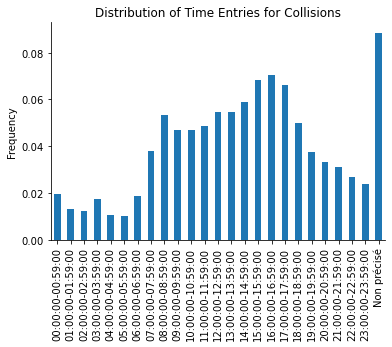

In [9]:
plt.figure()
collisions['time'].value_counts(normalize=True).sort_index().plot.bar()
plt.title('Distribution of Time Entries for Collisions')
plt.ylabel('Frequency')
sns.despine()
plt.show()

Here we can really see that a large proportion of null values are undefined.  We will randomly sample from the existing distribution to impute these values.  It will introduce some error into future models, but seems like a good approach for dealing with this.

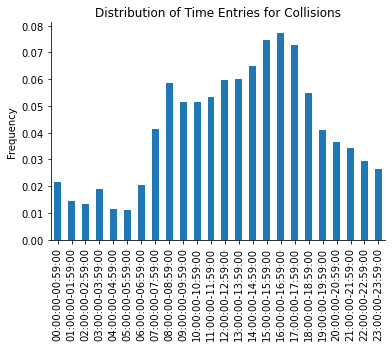

In [10]:
# get a mask which we can utilize to extract the rows with missing time entries
missing = collisions['time'].str[0] == 'N'

# fill by randomly sampling from the existing distribution
collisions.loc[missing, 'time'] = np.random.choice(spread.index, size=len(collisions[missing]), p=spread.values)

# drop any remaining 'non-precise' rows
collisions.drop(collisions[missing].index, inplace=True)

# visualize the new distribution
plt.figure()
collisions['time'].value_counts(normalize=True).sort_index().plot.bar()
plt.title('Distribution of Time Entries for Collisions')
plt.ylabel('Frequency')
sns.despine()
plt.show()

The distribution looks the same as it did before, so it looks as though the imputation was executed properly.  We can now convert these to numeric values:

In [11]:
collisions['hour'] = collisions['time'].str[:5].astype('datetime64').dt.hour

We can also check for any other null values:

In [12]:
collisions.isna().sum()

day_of_week                 0
date                        0
street                  10765
num_vehicles                0
num_deceased                0
num_gravely_injured         0
num_minorly_injured         0
time                        0
year                        0
num_victims                 0
gravity                     0
num_cars                    0
num_trucks                  0
num_utility_vehicles        0
num_buses                   0
num_bikes                   0
num_mopeds                  0
num_motorcycles             0
num_taxis                   0
num_emerg_vehicles          0
num_snowmobiles             0
num_VHR                     0
num_other                   0
nb_veh_non_precise          0
num_peds_deceased           0
num_peds_injured            0
num_peds_victims            0
num_moto_deceased           0
num_moto_injured            0
num_moto_victims            0
num_cycl_deceased           0
num_cycl_injured            0
num_cycl_victims            0
speed_limi

We appear to have some columns with a substantial number of null values, as well as a select few rows with null entries for `lat` and `lon`.  We will drop the `speed limit` and `street` columns, and drop the 11 rows with null `lat` and `lon` values. 

In [13]:
# drop speed limit bc lots of null values
collisions.drop(columns=['speed_limit'], inplace=True)

# drop street bc also lots of null values
collisions.drop(columns=['street'], inplace=True)

# drop the remaining rows with null values (there are 13 lat/lon values which are null)
collisions.dropna(inplace=True)

In [14]:
collisions.head()

,day_of_week,date,num_vehicles,num_deceased,num_gravely_injured,num_minorly_injured,time,year,num_victims,gravity,num_cars,num_trucks,num_utility_vehicles,num_buses,num_bikes,num_mopeds,num_motorcycles,num_taxis,num_emerg_vehicles,num_snowmobiles,num_VHR,num_other,nb_veh_non_precise,num_peds_deceased,num_peds_injured,num_peds_victims,num_moto_deceased,num_moto_injured,num_moto_victims,num_cycl_deceased,num_cycl_injured,num_cycl_victims,lat,lon,month,day,weekday,hour
1,SA,2012-06-02,1,0,0,0,15:00:00-15:59:00,2012,0,Dommages matériels seulement,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.48772,-73.71603,6,2,5,15
2,JE,2012-06-28,2,0,0,0,08:00:00-08:59:00,2012,0,Dommages matériels inférieurs au seuil de rapp...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.51432,-73.68279,6,28,3,8
3,ME,2012-07-11,2,0,0,0,09:00:00-09:59:00,2012,0,Dommages matériels inférieurs au seuil de rapp...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,45.49221,-73.57647,7,11,2,9
5,LU,2012-01-02,2,0,0,0,14:00:00-14:59:00,2012,0,Dommages matériels seulement,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.48687,-73.87855,1,2,0,14
6,MA,2012-01-03,2,0,0,0,12:00:00-12:59:00,2012,0,Dommages matériels seulement,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.49170,-73.85536,1,3,1,12


Finally, we can filter this table down to only those columns which will be useful in modelling or visualization, and save.

In [15]:
collisions = collisions[['date', 'lat', 'lon', 'year', 'month', 'day', 'hour', 'weekday', 'num_vehicles', 'num_victims']]
collisions.head()

,date,lat,lon,year,month,day,hour,weekday,num_vehicles,num_victims
1,2012-06-02,45.48772,-73.71603,2012,6,2,15,5,1,0
2,2012-06-28,45.51432,-73.68279,2012,6,28,8,3,2,0
3,2012-07-11,45.49221,-73.57647,2012,7,11,9,2,2,0
5,2012-01-02,45.48687,-73.87855,2012,1,2,14,0,2,0
6,2012-01-03,45.49170,-73.85536,2012,1,3,12,1,2,0


In [16]:
collisions.to_csv('Data/collisions_cleaned.csv', index=False)